In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("Mumbai House Prices.csv")

In [19]:
df['Total_Price'] = pd.cut(df["price"] , bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf] , labels = [1 , 2 , 3 , 4 , 5])

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1 , test_size = 0.2 , random_state = 42)

for train_index, test_index in split.split(df, df["Total_Price"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [21]:
strat_test_set

,bhk,type,locality,area,price,price_unit,region,status,age,Total_Price
61289,3,Apartment,ACME Ozone Phase 2,1650,1.75,Cr,Thane West,Ready to move,Unknown,2
48317,1,Apartment,Parinee Essence,550,90.00,L,Kandivali West,Ready to move,Resale,5
52836,4,Apartment,Vasant Vasant Vihar,2200,2.25,Cr,Thane West,Ready to move,Unknown,2
70251,2,Apartment,Cosmos B 3 Hilton,1125,1.05,Cr,Thane West,Under Construction,Unknown,1
22697,2,Apartment,Avant Hillway,510,99.56,L,Goregaon East,Under Construction,New,5
...,...,...,...,...,...,...,...,...,...,...
6035,2,Apartment,JP Codename Dream Home Tower C,975,84.71,L,Mira Road East,Under Construction,New,5
5307,3,Apartment,Godrej Urban Park,1360,3.45,Cr,Powai,Under Construction,New,3
46860,2,Apartment,Lodha Palava Lakeshore Greens,1254,67.12,L,Dombivali,Ready to move,Resale,5
38749,2,Villa,Vikrant Ruby,1400,47.50,L,Neral,Under Construction,New,5


In [22]:
#Removing the total price column
for col in (strat_train_set , strat_test_set):
    col.drop("Total_Price" , axis = 1 , inplace = True)

In [23]:
strat_train_set

,bhk,type,locality,area,price,price_unit,region,status,age
73794,1,Apartment,Runwal Codename BeWise,422,73.00,L,Thane West,Under Construction,New
48108,2,Apartment,Shailesh Riddhi Siddhi Residency,1125,95.00,L,Ulwe,Ready to move,Resale
23011,3,Apartment,Shagun Silver Heights,1450,1.00,Cr,Ulwe,Ready to move,Resale
8119,1,Apartment,Laxmi Kailash Garden,755,51.00,L,Kalyan West,Ready to move,Resale
34876,2,Apartment,Alag Olive,728,1.44,Cr,Ghatkopar East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
40904,3,Apartment,SD Siennaa Wing B,1572,2.37,Cr,Kandivali East,Under Construction,New
72458,2,Apartment,Rustomjee Urbania,848,1.58,Cr,Thane West,Ready to move,New
62179,2,Apartment,Indiabulls Greens,1300,95.00,L,Panvel,Under Construction,New
11411,4,Apartment,Bombay ICC,2550,10.75,Cr,Wadala,Ready to move,Resale


In [24]:
df = strat_train_set.copy()

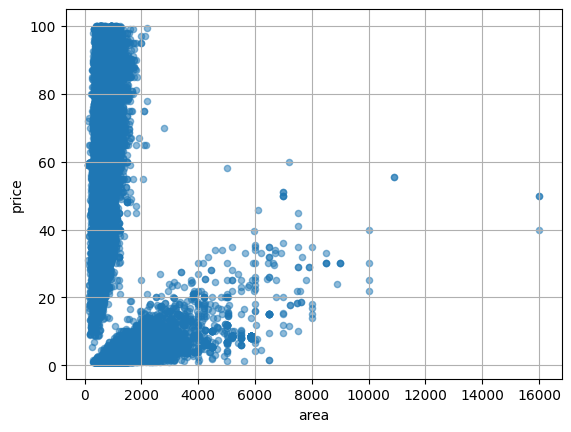

In [33]:
import matplotlib.pyplot as plt
df.plot(kind = "scatter" , x = "area" , y = "price" , grid = True , alpha = 0.5)
plt.show()